Pablo Alejandro Aguirre Higuera

Matrícula: 263845

**Práctica #20. Normalización y Transformación de Datos**

10/10/2025

#### **Ejercicio 1: Normalización Min-Max**

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?
2. ¿Qué interpretas del p-valor antes y después de la normalización?


In [1]:
import sklearn as skl
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_wine = skl.datasets.load_wine(as_frame=True).frame
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [2]:
print(df_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Si bien es un dataset de sklearn, hay que asegurarse siempre que de que no haya datos faltantes y que estén con el tipo de dato correcto. Se trabajará con la variable **malic_acid**.

Shapiro-Wilk Test: p-valor = 0.00000


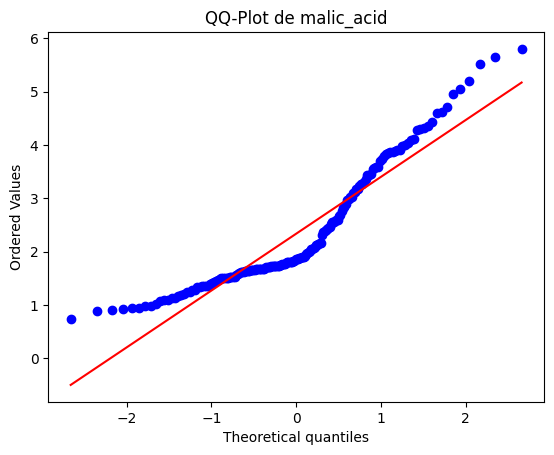

In [3]:
shapiro = stats.shapiro(df_wine["malic_acid"])
print(f"Shapiro-Wilk Test: p-valor = {shapiro.pvalue:.5f}")

stats.probplot(df_wine["malic_acid"], dist="norm", plot=plt)
plt.title(f"QQ-Plot de malic_acid")

plt.show()

De acuerdo con la prueba de Shapiro-Wilk, se rechaza la hipótesis nula de que los datos siguen una distribución normal.

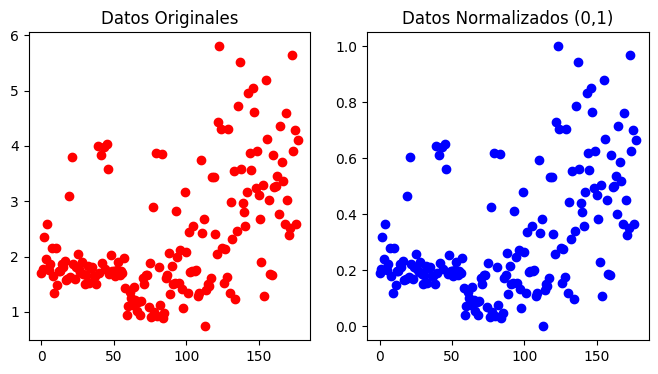

In [4]:
datos_orig = df_wine["malic_acid"].values.reshape(-1,1) #Convierte los datos en una lista unidimensional

min_max = skl.preprocessing.MinMaxScaler(feature_range=(0,1))
datos_norm = min_max.fit_transform(datos_orig)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(range(len(datos_orig)), datos_orig, color='red', label="Original")
plt.title("Datos Originales")

plt.subplot(1, 2, 2)
plt.scatter(range(len(datos_norm)), datos_norm, color='blue', label="Min-Max Scaling")
plt.title("Datos Normalizados (0,1)")

plt.show()

Shapiro-Wilk Test: p-valor = 0.00000


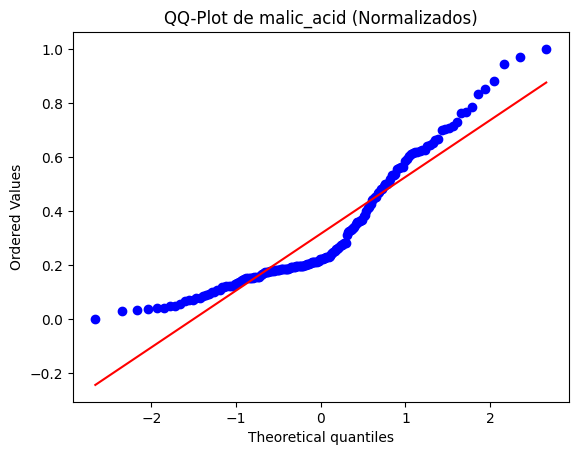

In [5]:
shapiro_norm = stats.shapiro(datos_norm)
print(f"Shapiro-Wilk Test: p-valor = {shapiro_norm.pvalue:.5f}")

stats.probplot(datos_norm.flatten(), dist="norm", plot=plt)
plt.title(f"QQ-Plot de malic_acid (Normalizados)")

plt.show()

**Conclusión:**

La normalización min-max únicamente cambia la escala de los datos; su distribución no la afecta. Por ello es que los QQplots y el resultado de la prueba de Shapiro-Wilk es el mismo.

#### **Ejercicio 2: Normalización Z-Score**

Instrucciones:
1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Z-Score a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1.	¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?
2.	¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?



Para este ejercicio, se trabajará con la variable **alcohol**.

Shapiro-Wilk Test: p-valor = 0.02005


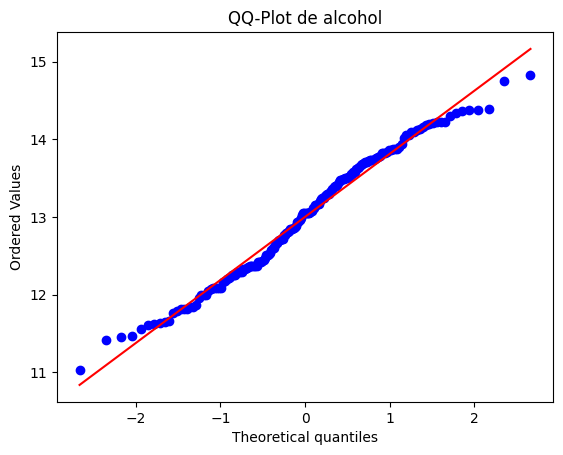

In [6]:
shapiro_alcohol_orig = stats.shapiro(df_wine["alcohol"])
print(f"Shapiro-Wilk Test: p-valor = {shapiro_alcohol_orig.pvalue:.5f}")

stats.probplot(df_wine["alcohol"], dist="norm", plot=plt)
plt.title(f"QQ-Plot de alcohol")

plt.show()

A un nivel de confianza del 99%, no se rechazaría la hipótesis nula de que los datos están distribuidos normalmente.

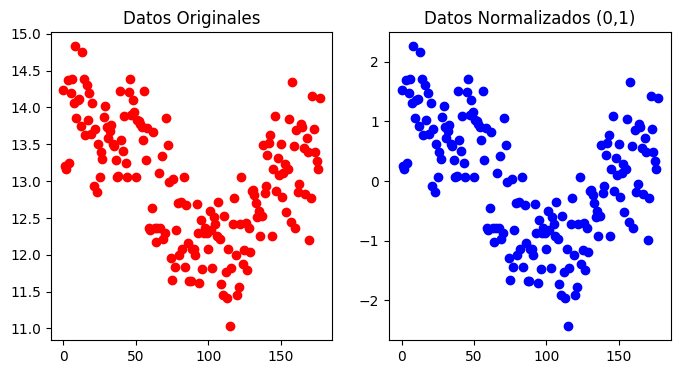

In [7]:
datos_orig_alcohol = df_wine["alcohol"].values.reshape(-1,1)

scaler = skl.preprocessing.StandardScaler()
datos_Z = scaler.fit_transform(datos_orig_alcohol)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(range(len(datos_orig_alcohol)), datos_orig_alcohol, color='red', label="Original")
plt.title("Datos Originales")

plt.subplot(1, 2, 2)
plt.scatter(range(len(datos_Z)), datos_Z, color='blue', label="Z-Score Scaling")
plt.title("Datos Normalizados (0,1)")

plt.show()

Shapiro-Wilk Test: p-valor = 0.02005


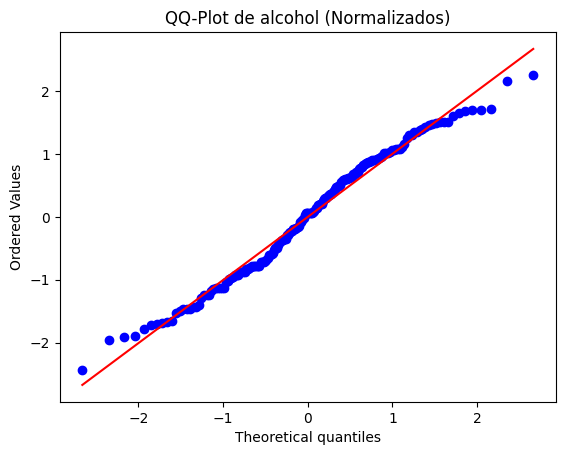

In [8]:
shapiro_Z = stats.shapiro(datos_Z)
print(f"Shapiro-Wilk Test: p-valor = {shapiro_Z.pvalue:.5f}")

stats.probplot(datos_Z.flatten(), dist="norm", plot=plt)
plt.title(f"QQ-Plot de alcohol (Normalizados)")

plt.show()

**Conclusión:**

Al igual que con la normalización Min-Max, la normalización Z-Score no tiene impacto en la distribución de los datos. Lo que hace Z-Score es ajustar los datos según a cuántas desviaciones estándar se encuentran de la media.

Es importante tomar este último punto en cuenta si, por ejemplo, se obtiene un modelo de regresión lineal después de aplicar la normalización Z-Score. Los coeficientes sobre las variables normalizadas marcan el tamaño de paso por desviaciones estándar y no por alguna unidad de medida convencional (metros, litros, pesos, años, etc.). Esto ciertamente impacta la interpretabilidad del modelo.

#### **Ejercicio 3: Transformación Logarítmica**
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación logarítmica (np.log) a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación logarítmica a la distribución de los datos?
2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?


Shapiro-Wilk Test (datos originales): p-valor = 0.00000
Shapiro-Wilk Test (datos transformados): p-valor = 0.00000


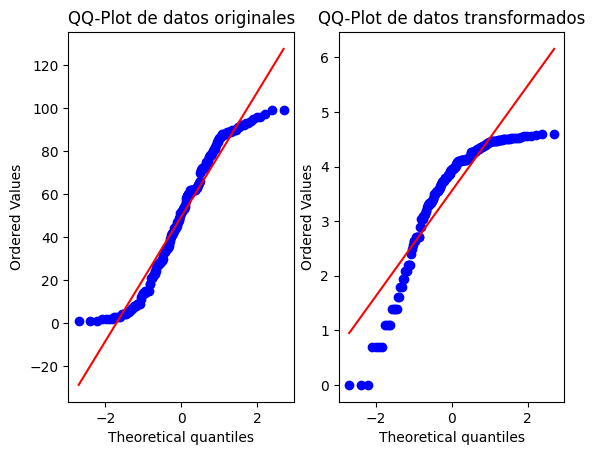

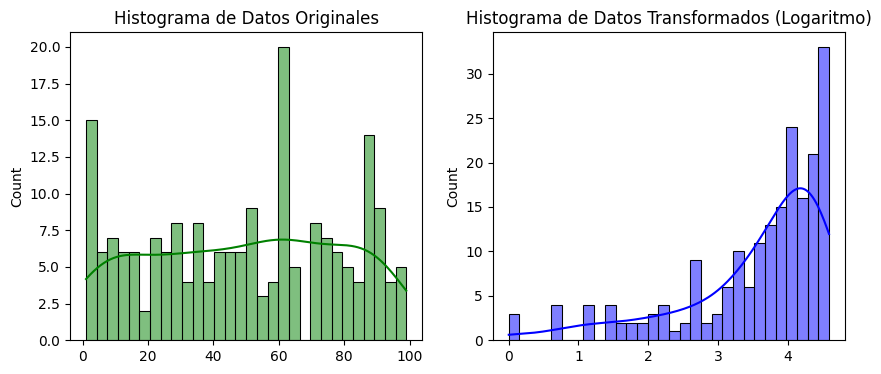

In [9]:
np.random.seed(42) #Para asegurar reproducibilidad

datos = np.random.randint(1, 100, 200)
datos_log = np.log(datos)

shapiro_nolog = stats.shapiro(datos)
print(f"Shapiro-Wilk Test (datos originales): p-valor = {shapiro_nolog.pvalue:.5f}")

shapiro_log = stats.shapiro(datos_log)
print(f"Shapiro-Wilk Test (datos transformados): p-valor = {shapiro_log.pvalue:.5f}")

plt.subplot(1,2,1)
stats.probplot(datos, dist="norm", plot=plt)
plt.title(f"QQ-Plot de datos originales")

plt.subplot(1,2,2)
stats.probplot(datos_log, dist="norm", plot=plt)
plt.title(f"QQ-Plot de datos transformados")

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.histplot(datos, kde=True, bins=30, color='green')
plt.title("Histograma de Datos Originales")

plt.subplot(1,2,2)
sns.histplot(datos_log, kde=True, bins=30, color='blue')
plt.title("Histograma de Datos Transformados (Logaritmo)")
plt.show()

**Conclusiones:**

Se observa cómo los datos transformados siguen una tendencia logarítmica. Sin embargo, no se asemejan más a una distribución normal. Al tratarse de datos generados aleatoriamente, los datos no tienen sesgo alguno. De haber sido datos sesgados a la derecha, quizás la transformación haría que los datos se asimilen más a una distribución gaussiana.

#### **Ejercicio 4: Transformación Raíz Cuadrada**
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación de raíz cuadrada a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?
2.	¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?


Shapiro-Wilk Test (datos originales): p-valor = 0.00000
Shapiro-Wilk Test (datos transformados): p-valor = 0.00000


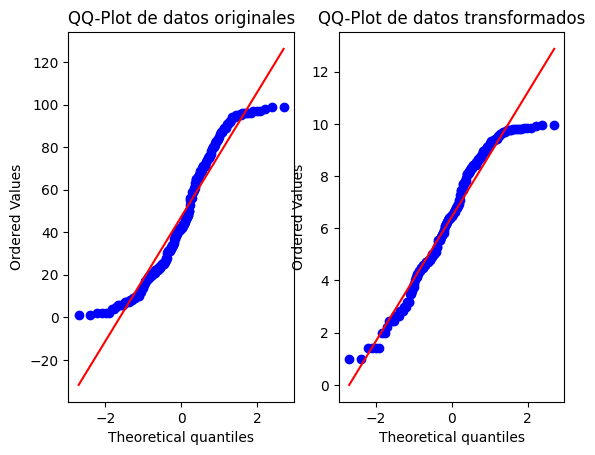

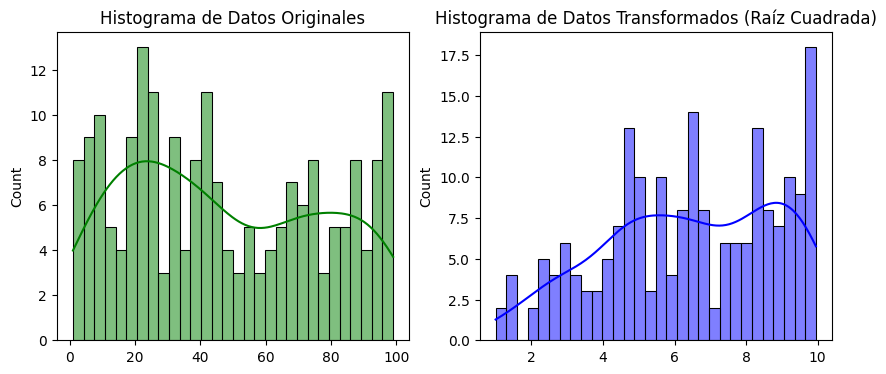

In [10]:
np.random.seed(36) #Para asegurar reproducibilidad

datos = np.random.randint(1, 100, 200)
datos_raiz = np.sqrt(datos)

shapiro_noraiz = stats.shapiro(datos)
print(f"Shapiro-Wilk Test (datos originales): p-valor = {shapiro_noraiz.pvalue:.5f}")

shapiro_raiz = stats.shapiro(datos_raiz)
print(f"Shapiro-Wilk Test (datos transformados): p-valor = {shapiro_raiz.pvalue:.5f}")

plt.subplot(1,2,1)
stats.probplot(datos, dist="norm", plot=plt)
plt.title(f"QQ-Plot de datos originales")

plt.subplot(1,2,2)
stats.probplot(datos_raiz, dist="norm", plot=plt)
plt.title(f"QQ-Plot de datos transformados")

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.histplot(datos, kde=True, bins=30, color='green')
plt.title("Histograma de Datos Originales")

plt.subplot(1,2,2)
sns.histplot(datos_raiz, kde=True, bins=30, color='blue')
plt.title("Histograma de Datos Transformados (Raíz Cuadrada)")

plt.show()

**Conclusión:**

Como es de esperarse, con la transformación los datos se asemejan a una función radical. Lo que sí se observa en la transformación es que la cola izquierda de los datos sí se acerca más a la línea roja del QQplot.

#### **Ejercicio 5: Transformación Box-Cox**
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación Box-Cox a la distribución de los datos?
2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?


Shapiro-Wilk Test (datos originales): p-valor = 0.00000
Shapiro-Wilk Test (datos transformados): p-valor = 0.00000


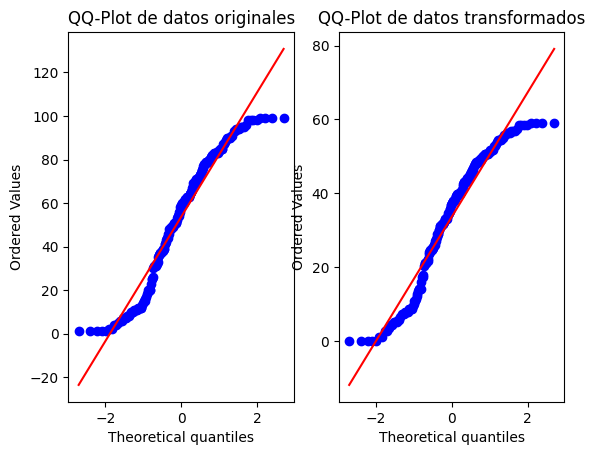

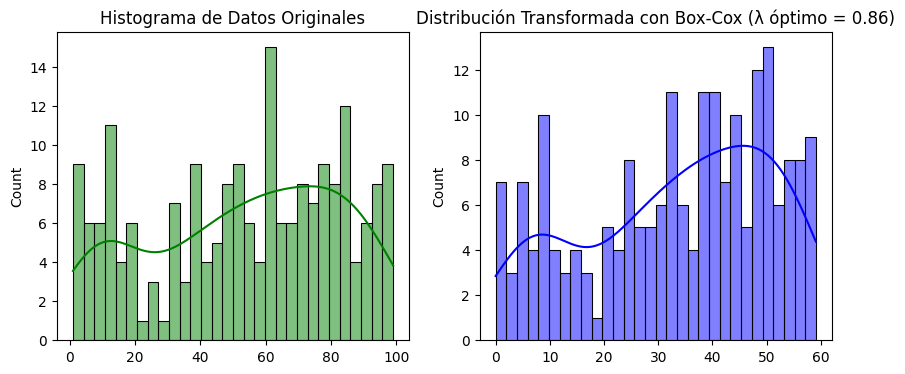

In [11]:
from scipy import stats
np.random.seed(32) #Para asegurar reproducibilidad

datos = np.random.randint(1, 100, 200)
datos_box, lambda_opt = stats.boxcox(datos)

shapiro_nobox = stats.shapiro(datos)
print(f"Shapiro-Wilk Test (datos originales): p-valor = {shapiro_nobox.pvalue:.5f}")

shapiro_box = stats.shapiro(datos_box)
print(f"Shapiro-Wilk Test (datos transformados): p-valor = {shapiro_box.pvalue:.5f}")

plt.subplot(1,2,1)
stats.probplot(datos, dist="norm", plot=plt)
plt.title(f"QQ-Plot de datos originales")

plt.subplot(1,2,2)
stats.probplot(datos_box, dist="norm", plot=plt)
plt.title(f"QQ-Plot de datos transformados")

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.histplot(datos, kde=True, bins=30, color='green')
plt.title("Histograma de Datos Originales")

plt.subplot(1,2,2)
sns.histplot(datos_box, kde=True, bins=30, color='blue')
plt.title(f"Distribución Transformada con Box-Cox (λ óptimo = {lambda_opt:.2f})")

plt.show()

**Conclusión:**

La transformación Box-Cox casi no cambió los datos. Entre más cercano esté el valor de lambda a 1, más intactos permanecen los datos. Esta aseveración se confirma con el par de histogramas graficados. El cambio que tuvo la transformación fue que el lado derecho de la distribución aumentó levemente la altura.